# IoT

Have you ever heard about `Internet of Things` devices? Of course, you have. Maybe you also have a Raspberry PI in your house monitoring the temperature and humidity. `IoT` devices are everywhere around us, collecting data about our environment. You will be analyzing Environmental data, Traffic data as well as energy counter data. Following the course, you will learn how to collect and store data from a data stream. You will prepare IoT data for analysis, analyze and visualize IoT data, before implementing a simple machine learning model to take action when certain events occur and deploy this model to a real-time data stream.

## Devices
IoT Devices are small devices, collecting data about their environment. Some can also manipulate certain predefined parameters in their environment.

## Data Streams

Data streams are a constant flow of data, such in:
    - Twitter messages
    - Online News
    - Video streams
    - Sensor data (IoT)
    - Market orders

# Message Queuing Telemetry Transport
MQTT is an efficient messaging protocol consisting of clients and brokers, which is often used in conjunction with IOT data streams.

<img src= '../images/mqtt.jpg'>

https://github.com/eclipse/paho.mqtt.python

## Acquire data with pandas
As you just saw, consuming a public API, converting the data and transforming this into a DataFrame required multiple lines of code.

This can be simplified by using pandas' `pd.read_json()`, which handles the above steps for you.

In [1]:
import pandas as pd

In [2]:
URL = 'https://assets.datacamp.com/production/repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/environ_MS83200MS_airtemp_600_30r.json'

# Load URL to Dataframe
df_temp = pd.read_json(URL)

In [3]:
df_temp.head()

,timestamp,value
0,2018-09-01 01:20:00,15.8
1,2018-09-01 01:30:00,15.7
2,2018-09-01 01:40:00,15.7
3,2018-09-01 01:50:00,15.6
4,2018-09-01 02:00:00,15.7


In [4]:
df_temp.dtypes

timestamp    datetime64[ns]
value               float64
dtype: object

## Store data
After consuming an API endpoint, it's often desirable to store the data to disk.

Some of the reasons we might want to store data are:

- archive reproducible results
- train ML Models

You will now consume the same api as you did in previous exercises, but this time you will store the data in both JSON and CSV format.

In [7]:
# Save dataframe as json
df_temp.to_json('../outputs/temperature.json', orient="records")

In [8]:
# Save dataframe as csv
df_temp.to_csv('../outputs/temperature.csv', index=False)

## Read data from file
The data you will work with now includes additional columns about the environment like humidity and air pressure. All data can be consumed seperately from the public API, and I've gathered, combined and stored 3 months for this course.

After having acquired and saved the data to disk, you should have a look at what was actually downloaded and stored.

In [17]:
URL = 'https://assets.datacamp.com/production/repositories/4296/datasets/b7afe8572732cb5c8e6687c7e0c51216983a2b12/environ_MS83200MS_nowind_3m-10min.json'

df_env = pd.read_json(URL)
df_env = df_env.set_index('timestamp')
df_env.head()

,precipitation,humidity,radiation,sunshine,pressure,temperature
timestamp,,,,,,
2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1
2018-09-01 00:05:00,0.1,NaN,NaN,NaN,NaN,NaN
2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
2018-09-01 00:15:00,0.0,NaN,NaN,NaN,NaN,NaN
2018-09-01 00:20:00,0.0,95.2,0.0,598.9,1016.5,16.1


In [10]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
timestamp        26175 non-null datetime64[ns]
precipitation    26162 non-null float64
humidity         13085 non-null float64
radiation        13085 non-null float64
sunshine         13083 non-null float64
pressure         13085 non-null float64
temperature      13059 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [11]:
df_env.describe()

,precipitation,humidity,radiation,sunshine,pressure,temperature
count,26162.000000,13085.000000,13085.000000,13083.000000,13085.000000,13059.000000
mean,0.008142,73.785059,118.825518,187.421539,1019.190394,14.067670
std,0.057470,20.232647,201.190397,273.950142,6.711385,6.612924
min,0.000000,8.900000,0.000000,0.000000,989.500000,-1.800000
25%,0.000000,57.500000,0.000000,0.000000,1016.000000,9.800000
50%,0.000000,78.900000,0.000000,0.000000,1019.700000,13.400000
75%,0.000000,91.300000,161.500000,598.900000,1023.300000,18.900000
max,2.700000,100.100000,928.000000,600.000000,1039.800000,30.400000


# EDA: Line plots
Plotting the series is an important step in the analysis process since it gives you an overview of how the data actually looks and allows us to identify trends and patterns easily.

In [12]:
import matplotlib.pyplot as plt

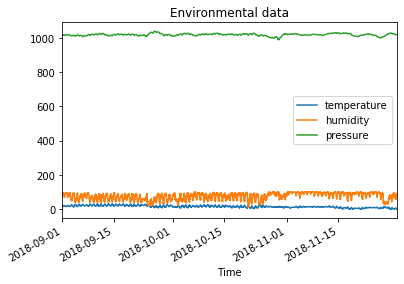

In [29]:
cols = ["temperature", "humidity", "pressure"]

# Create a line plot
df_env[cols].dropna().plot(title="Environmental data")

# Label X-Axis
plt.xlabel("Time")

# Show plot
plt.show()

## Histogram Plot
While it's important to know how the data looks, data distribution is equally important.

You can do this for the environmental dataset by plotting histograms.

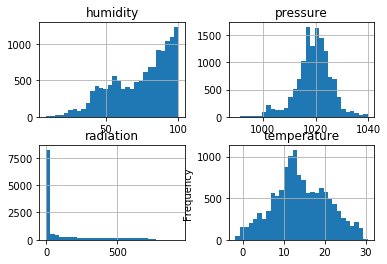

In [38]:
cols = ["temperature", "humidity", "pressure", "radiation"]

# Create a histogram
df_env[cols].hist(bins=30)

# Label Y-Axis
plt.ylabel("Frequency")

# Show plot
plt.show()

# Cleaning data
## Dealing with missing data
After looking at the output on the Console, how would you get rid of the `NaN` values?

We can either drop missing values, or replace missing values with their previous value. However, we lack some context which method makes more sense.

In [39]:
df_env_clean = df_env.fillna(method="ffill")
df_env_clean

,precipitation,humidity,radiation,sunshine,pressure,temperature
timestamp,,,,,,
2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1
2018-09-01 00:05:00,0.1,95.6,0.0,599.2,1016.3,16.1
2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
2018-09-01 00:15:00,0.0,95.5,0.0,600.0,1016.4,16.1
2018-09-01 00:20:00,0.0,95.2,0.0,598.9,1016.5,16.1
...,...,...,...,...,...,...
2018-11-30 22:40:00,0.0,92.8,0.0,0.0,1020.8,-0.7
2018-11-30 22:45:00,0.0,92.8,0.0,0.0,1020.8,-0.7
2018-11-30 22:50:00,0.0,93.0,0.0,0.0,1020.9,-0.7


While analyzing data, you should be aware of any longer, connected periods without data, as this can influence your results.

While you can fill columns with missing data, the previous methods did not reveal if no data is present for a period of time.

In [62]:
# Resample data
df_env_res = df_env.resample("20min").mean()
df_env_res

,precipitation,humidity,radiation,sunshine,pressure,temperature
timestamp,,,,,,
2018-09-01 00:00:00,0.025,95.55,0.0,599.60,1016.35,16.10
2018-09-01 00:20:00,0.000,95.15,0.0,599.45,1016.45,16.10
2018-09-01 00:40:00,0.000,95.15,0.0,599.25,1016.20,16.05
2018-09-01 01:00:00,0.000,94.90,0.0,599.50,1016.05,15.95
2018-09-01 01:20:00,0.000,94.20,0.0,600.00,1015.80,15.75
...,...,...,...,...,...,...
2018-11-30 21:40:00,0.000,88.00,0.0,0.00,1020.55,0.15
2018-11-30 22:00:00,0.000,90.95,0.0,0.00,1020.60,-0.25
2018-11-30 22:20:00,0.000,92.30,0.0,0.00,1020.70,-0.55


# Combine and resample
You'll now combine environmental data with a traffic dataset. The traffic consists of 2 columns, `light_veh` and `heavy_veh`.

- `heavy_veh` represents the number of heavy vehicles like lorries or busses per hour on a road of a small city.
- `light_veh` contains the number of light vehicles, like automobiles or motorbikes per hour on that road.

In [72]:
heavy_veh = pd.read_json('https://assets.datacamp.com/production/repositories/4296/datasets/2ab899af51dac636796c5b3fce2f27f69010a6d6/traffic_raw_siemens_heavy-veh.json')
heavy_veh = heavy_veh.set_index('timestamp')
heavy_veh.columns = ['heavy_veh']
heavy_veh.head()

,heavy_veh
timestamp,
2018-09-01 00:07:30,0
2018-09-01 00:22:30,0
2018-09-01 00:37:30,0
2018-09-01 00:52:30,0
2018-09-01 01:07:30,0


In [73]:
light_veh = pd.read_json('https://assets.datacamp.com/production/repositories/4296/datasets/d4eae90c370fa6912c035323737c9fc276792514/traffic_raw_siemens_light-veh.json')
light_veh = light_veh.set_index('timestamp')
light_veh.columns = ['light_veh']
light_veh.head()

,light_veh
timestamp,
2018-09-01 00:07:30,0
2018-09-01 00:22:30,0
2018-09-01 00:37:30,0
2018-09-01 00:52:30,0
2018-09-01 01:07:30,0


In [78]:
# Combine the dataframes
traffic = pd.concat([light_veh, heavy_veh], axis=1)
traffic.head()

,light_veh,heavy_veh
timestamp,,
2018-09-01 00:07:30,0,0
2018-09-01 00:22:30,0,0
2018-09-01 00:37:30,0,0
2018-09-01 00:52:30,0,0
2018-09-01 01:07:30,0,0


In [80]:
environ = df_env[['temperature','humidity','sunshine']]
environ.head()

,temperature,humidity,sunshine
timestamp,,,
2018-09-01 00:00:00,16.1,95.6,599.2
2018-09-01 00:05:00,NaN,NaN,NaN
2018-09-01 00:10:00,16.1,95.5,600.0
2018-09-01 00:15:00,NaN,NaN,NaN
2018-09-01 00:20:00,16.1,95.2,598.9


In [81]:
# Combine the dataframes
environ_traffic = pd.concat([environ, traffic], axis=1)
environ_traffic

,temperature,humidity,sunshine,light_veh,heavy_veh
timestamp,,,,,
2018-09-01 00:00:00,16.1,95.6,599.2,NaN,NaN
2018-09-01 00:05:00,NaN,NaN,NaN,NaN,NaN
2018-09-01 00:07:30,NaN,NaN,NaN,0.0,0.0
2018-09-01 00:10:00,16.1,95.5,600.0,NaN,NaN
2018-09-01 00:15:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-11-30 22:45:00,NaN,NaN,NaN,NaN,NaN
2018-11-30 22:50:00,-0.7,93.0,0.0,NaN,NaN
2018-11-30 22:52:30,NaN,NaN,NaN,0.0,0.0


In [82]:
# Create agg logic
agg_dict = {"temperature": "max", "humidity": "max", "sunshine": "sum", 
            "light_veh": "sum", "heavy_veh": "sum"}

In [85]:
# Resample the dataframe 
environ_traffic_resampled = environ_traffic.resample("1h").agg(agg_dict)
environ_traffic_resampled

,temperature,humidity,sunshine,light_veh,heavy_veh
timestamp,,,,,
2018-09-01 00:00:00,16.1,95.6,3596.6,0.0,0.0
2018-09-01 01:00:00,16.0,95.0,3597.5,0.0,0.0
2018-09-01 02:00:00,15.9,95.2,3599.1,17.0,0.0
2018-09-01 03:00:00,15.6,94.8,3597.7,45.0,1.0
2018-09-01 04:00:00,14.4,93.5,3596.6,81.0,5.0
...,...,...,...,...,...
2018-11-30 19:00:00,1.5,83.7,0.0,193.0,15.0
2018-11-30 20:00:00,1.3,87.0,0.0,132.0,9.0
2018-11-30 21:00:00,0.6,88.3,0.0,4.0,0.0


# Heatmaps

You'll now try to find correlations between the columns.

In [88]:
import seaborn as sns

In [87]:
# Calculate correlation
corr = environ_traffic_resampled.corr()
corr

,temperature,humidity,sunshine,light_veh,heavy_veh
temperature,1.000000,-0.633517,0.552025,0.269667,0.271945
humidity,-0.633517,1.000000,-0.522445,-0.362288,-0.364290
sunshine,0.552025,-0.522445,1.000000,0.336052,0.335833
light_veh,0.269667,-0.362288,0.336052,1.000000,0.997889
heavy_veh,0.271945,-0.364290,0.335833,0.997889,1.000000


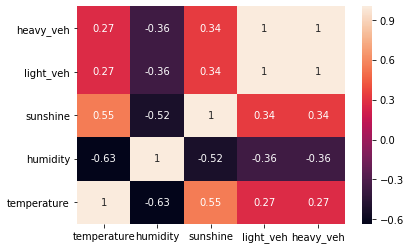

In [95]:
ax = sns.heatmap(corr, annot=True)
ax.set_ylim(0, len(corr))
plt.show()

## Pairplot
You'll now further investigate the data using a pairplot.

As you remember, a pairplot can be a useful tool since it combines histograms with scatter-plots showing the distribution between 2 columns.

C:\Users\vilieri.i\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vilieri.i\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


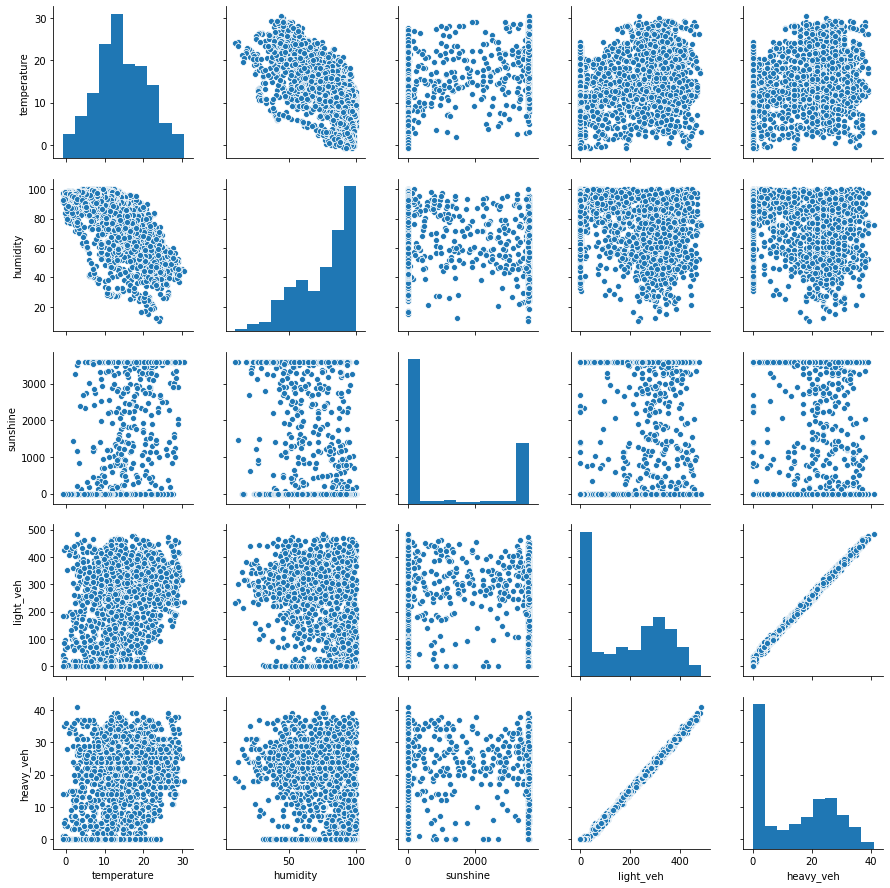

In [97]:
# Create a pairplot
sns.pairplot(environ_traffic_resampled)

# Show plot
plt.show()

# Outliers

You'll now work on visualizing these outliers by using the method you've just learned.

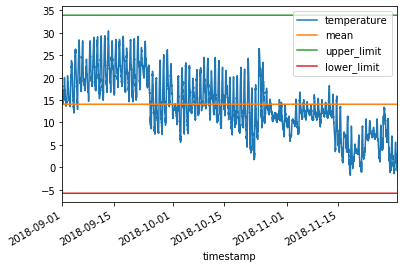

In [100]:
# Calculate mean
temp = df_env[["temperature"]].dropna()
temp["mean"] = temp["temperature"].mean()

# Calculate upper and lower limits
temp["upper_limit"] = temp["mean"] + (temp["temperature"].std() * 3)
temp["lower_limit"] = temp["mean"] - (temp["temperature"].std() * 3)

# Plot the dataframe
temp.plot()
plt.show()

# Seasonal decomposition
In the last exercise, you identified some repetitive patterns in the env data with both visual inspection and using an autocorrelation plot.

You'll now dissect this data further by splitting it into it's components.

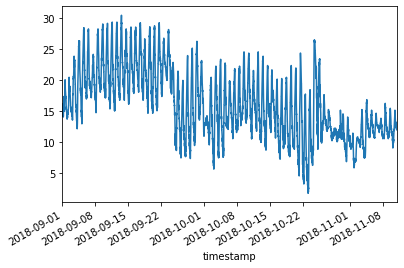

In [103]:
# Plot traffic dataset
temp[:"2018-11-10"]['temperature'].plot()

# Show plot
plt.show()

In [106]:
import statsmodels.api as sm

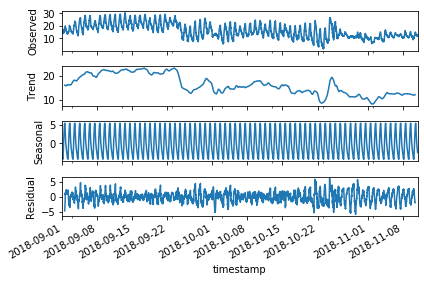

In [124]:
# Perform decompositon
temp = df_env[["temperature"]].dropna()
res = sm.tsa.seasonal_decompose(temp[:"2018-11-10"].temperature, freq=int(24*60/10))
res.plot()
plt.show()

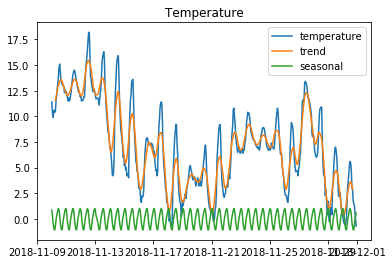

In [134]:
# Resample dataframe to 1h
df_seas = temp["2018-11-10":].resample('1h').max().dropna()

# Run seasonal decompose
decomp = sm.tsa.seasonal_decompose(df_seas, freq=12)

# Plot the timeseries
plt.title("Temperature")
plt.plot(df_seas["temperature"], label="temperature")

# Plot trend and seasonality
plt.plot(decomp.trend["temperature"], label="trend")
plt.plot(decomp.seasonal["temperature"], label="seasonal")
plt.legend()
plt.show()